In [1]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sys.path.append('/app/src')
sys.path.append('/app/src/utils')
sys.path.append('/app/src/_experimental')

from config import (
    Config,
    ModeConfig,
    FilterConfig,
    SensorConfig,
    DatasetConfig,
    VisualizationConfig
)
from single_threaded_pipeline_experiment import SingleThreadedPipelineExperiment

%matplotlib inline
np.random.seed(777)

# Background

This experiment is to verify EKF's robustness by intentionally dropping some stereo camera's frames meaning that there is no measurement update step to correct estimate resulting in IMU-only dead reckoning.

This experiment is conducted only for EKF with Velocity motion model since it is still eble to provide localization estimation during dead-reckoing in IMU-only environment.

The other filters, such as UKF and CKF, employ sampling based approach, where state error covariance matrix P is important to generate the sample point. For the filters that use probabilistic approach such as Particle filter requires resampling after state correction. Hence, if no correction step involved, the filter tend to encounter filter divergence. Likewise Particle Filter, Ensemble Kalman Filter also propagate samples and if no measurement update step included in filtering process, the samples expand around the mean, which leads to filter divergence.


Two trajectories from KITTI dataset seq. 0033 are selected:

    1. A curved trajectory: More veriance in gyroscope data so that angle estimation is important to keep tracking. Seq. 0033: 500 - 900. Dropout start from 600.
    2. A straight line trajectory: The value of acceleration is important hence it is useful to check translation error when VO data is dropped. Seq. 0033: 1100 - 1500. Dropout start from 1200.

<img src="/app/images/vo_dropout_cropped_trajectory.png" />



Duration of VO data dropout is increased from 1 second upto 16 seconds:
[1., 2., 4., 8., 16.]

In [2]:
save_root_dir = "/app/outputs/KITTI"
variant_98 = "0098"

In [3]:
def get_config(variant, second: int):
    config_filepath = "/app/notebooks/KITTI/conclusions/dropout/config.yaml"
    
    config = Config(config_filepath=config_filepath)
    _new_dataset_config = config.dataset._asdict()
    _new_dataset_config['variant'] = variant
    
    _new_visualization_config = config.visualization._asdict()
    _new_visualization_config['output_filepath'] = os.path.join(
         _new_visualization_config['output_filepath'], 
         str(second)
     )
    
    config.dataset = config.dataset._replace(**_new_dataset_config)
    config.visualization = config.visualization._replace(**_new_visualization_config)
    return config

## No drop

VO failed estimating trajectory


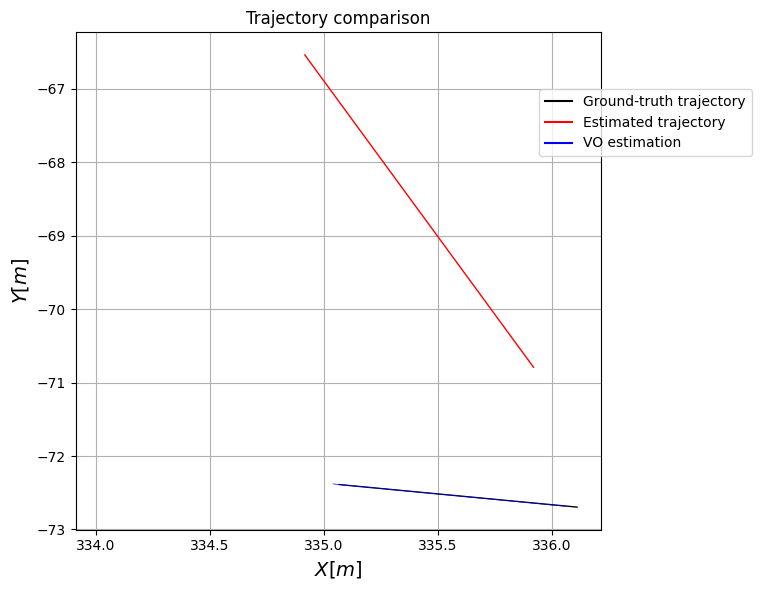

In [8]:
second = 0

config = get_config(variant=variant_98, second=second)
pipeline_no_drop = SingleThreadedPipelineExperiment(
    config=config,
    frame_drop_in_s=second
)

error_no_drop = pipeline_no_drop.demonstrate()

## 1 second

VO failed estimating trajectory


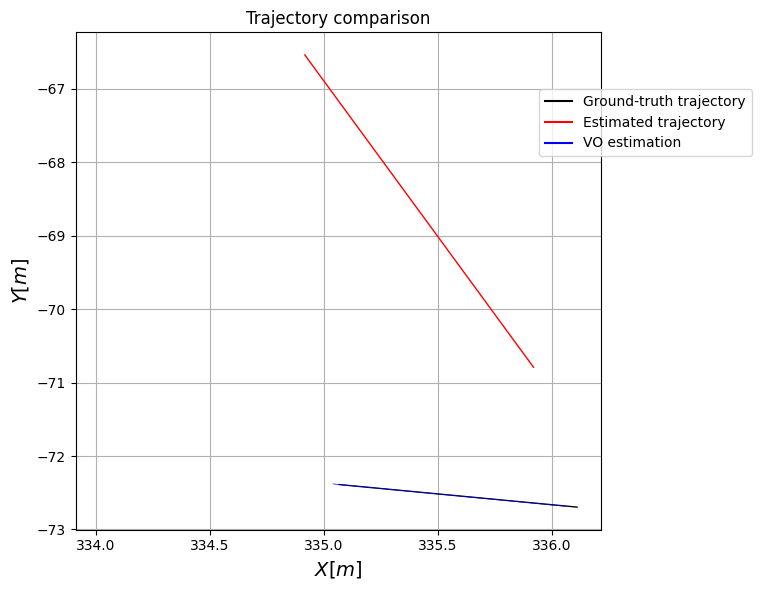

VO failed estimating trajectory


In [4]:
second = 1

config = get_config(variant=variant_98, second=second)
pipeline1 = SingleThreadedPipelineExperiment(
    config=config,
    frame_drop_in_s=second
)

error_1 = pipeline1.demonstrate()

## 2 seconds

VO failed estimating trajectory


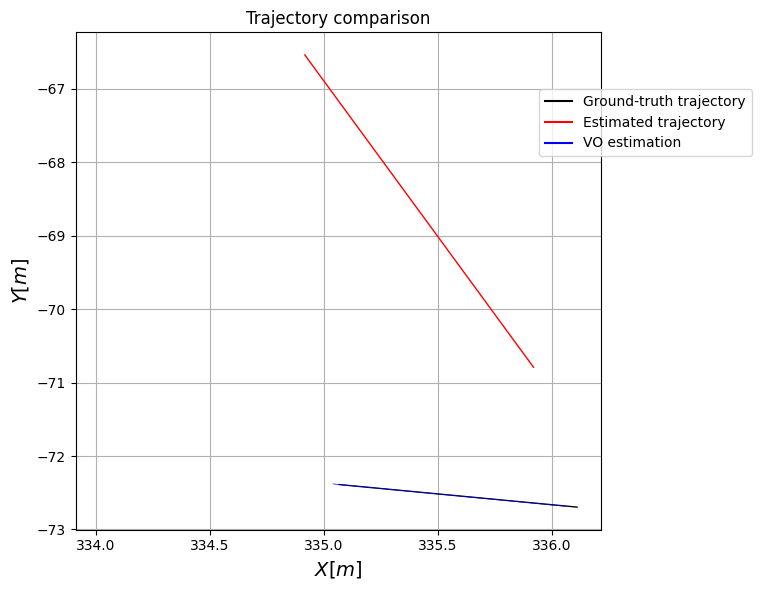

VO failed estimating trajectory


In [15]:
second = 2

config = get_config(variant=variant_98, second=second)
pipeline2 = SingleThreadedPipelineExperiment(
    config=config,
    frame_drop_in_s=second
)

error_2 = pipeline2.demonstrate()

## 4 seconds

VO failed estimating trajectory


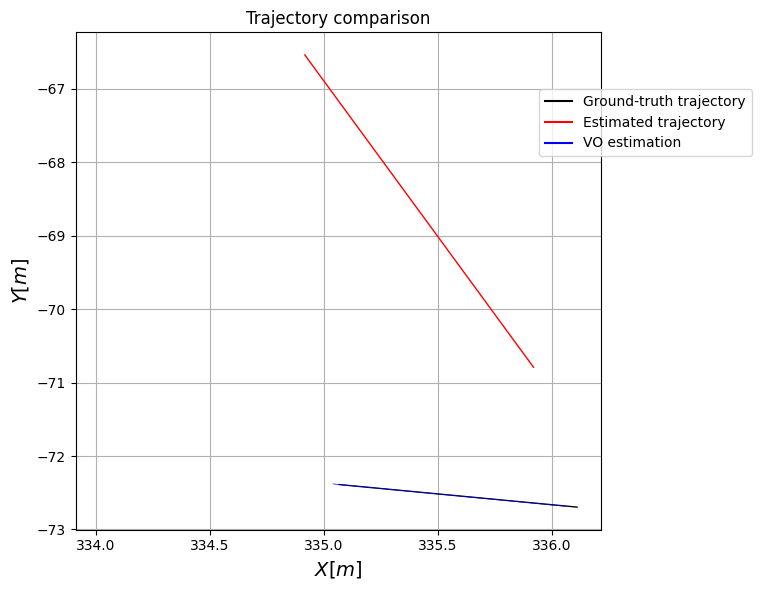

VO failed estimating trajectory


In [5]:
second = 4

config = get_config(variant=variant_98, second=second)
pipeline4 = SingleThreadedPipelineExperiment(
    config=config,
    frame_drop_in_s=second
)

error_4 = pipeline4.demonstrate()

## 8 seconds

VO failed estimating trajectory


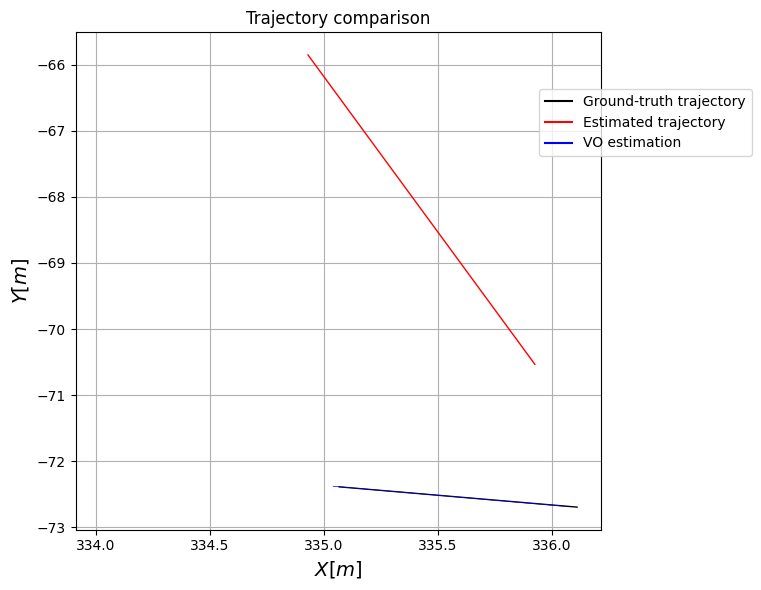

VO failed estimating trajectory


In [6]:
second = 8

config = get_config(variant=variant_98, second=second)
pipeline8 = SingleThreadedPipelineExperiment(
    config=config,
    frame_drop_in_s=second
)

error_8 = pipeline8.demonstrate()

## 16 seconds

VO failed estimating trajectory


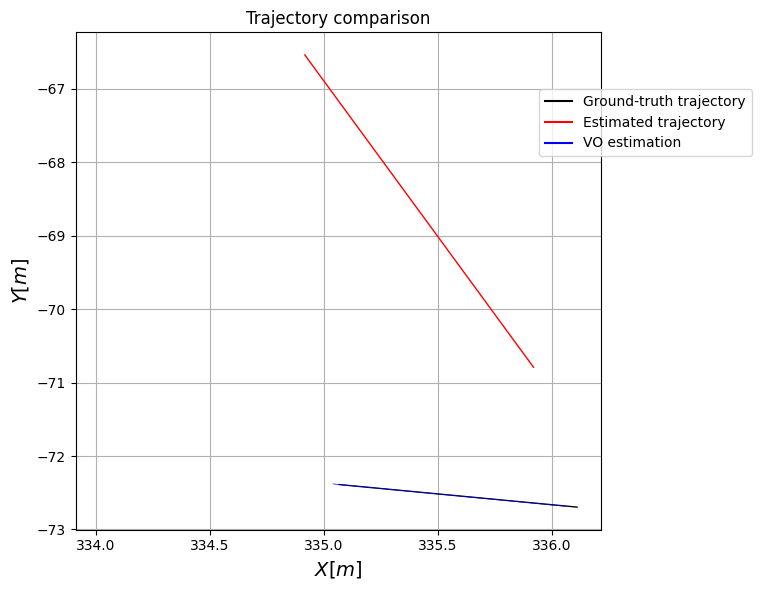

VO failed estimating trajectory


In [7]:
second = 16

config = get_config(variant=variant_98, second=second)
pipeline16 = SingleThreadedPipelineExperiment(
    config=config,
    frame_drop_in_s=second
)

error_16 = pipeline16.demonstrate()

In [23]:
error_list = [error_no_drop, error_1, error_2, error_4, error_8, error_16]
mae_error_list = np.array([error.mae for error in error_list])
rmse_error_list = np.array([error.rmse for error in error_list])
max_error_list = np.array([error.max for error in error_list])
dropout_list = np.hstack([np.array([0.]), np.array([2**i for i in range(0, 5)])])
dropout_list

array([ 0.,  1.,  2.,  4.,  8., 16.])

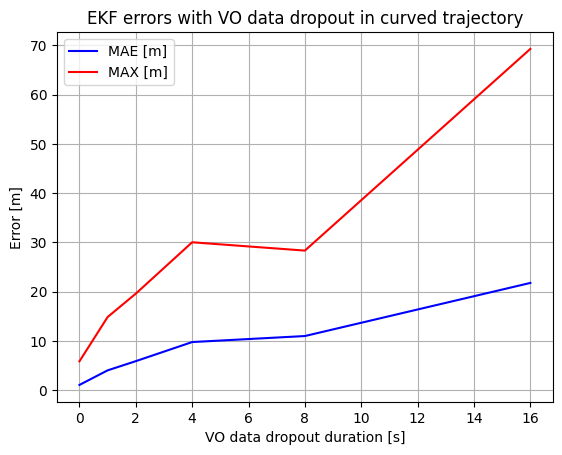

In [28]:
plt.title("EKF errors with VO data dropout in curved trajectory")
plt.plot(dropout_list, mae_error_list, label="MAE [m]", color="blue")
plt.plot(dropout_list, max_error_list, label="MAX [m]", color="red")
plt.xlabel("VO data dropout duration [s]")
plt.ylabel("Error [m]")
plt.legend()
plt.grid()